### **Import Required Libraries**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_palette('Set2')

### **Load Netflix Dataset**

In [36]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles (3).csv


In [37]:
df = pd.read_csv('netflix_titles (2).csv')

### **Dataset Overview**

In [38]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [39]:
df.shape

(8807, 12)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [41]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### **Check for Missing Values**

In [42]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


### **Data Cleaning**

In [43]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

In [69]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [70]:
df['cast'] = df['cast'].fillna("Not Available")

In [71]:
df['rating'] = df['rating'].ffill()

In [50]:
df.dropna(subset=['director'], inplace=True)

## **Remove Duplicate Records**

In [51]:
df.duplicated().sum()

np.int64(0)

In [52]:
df.drop_duplicates(inplace=True)

### **Feature Engineering**

In [53]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

### **Content Type Count (Movies vs TV Shows)**

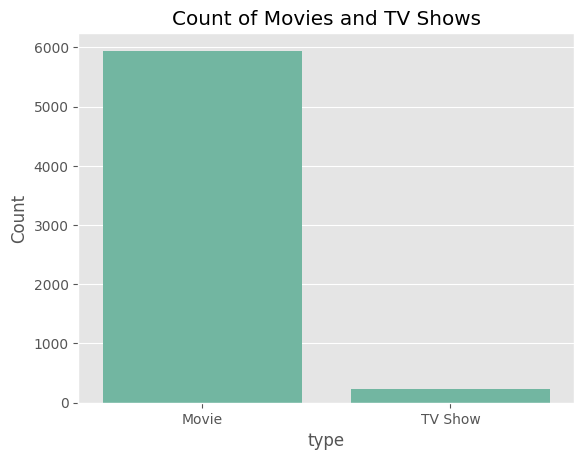

In [54]:
sns.countplot(data=df, x='type')
plt.title('Count of Movies and TV Shows')
plt.xlabel("type")
plt.ylabel("Count")
plt.show()

### **Top 10 Content-Producing Countries**

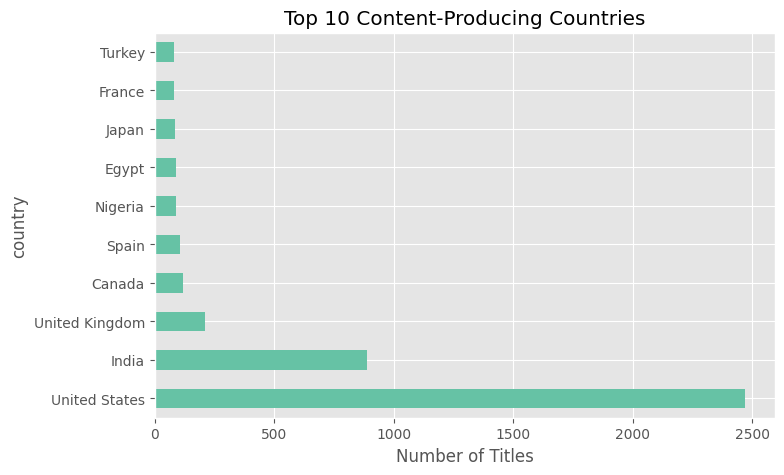

In [60]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', title='Top 10 Content-Producing Countries', figsize=(8,5))
plt.xlabel('Number of Titles')
plt.show()

### **Release Year Trend**

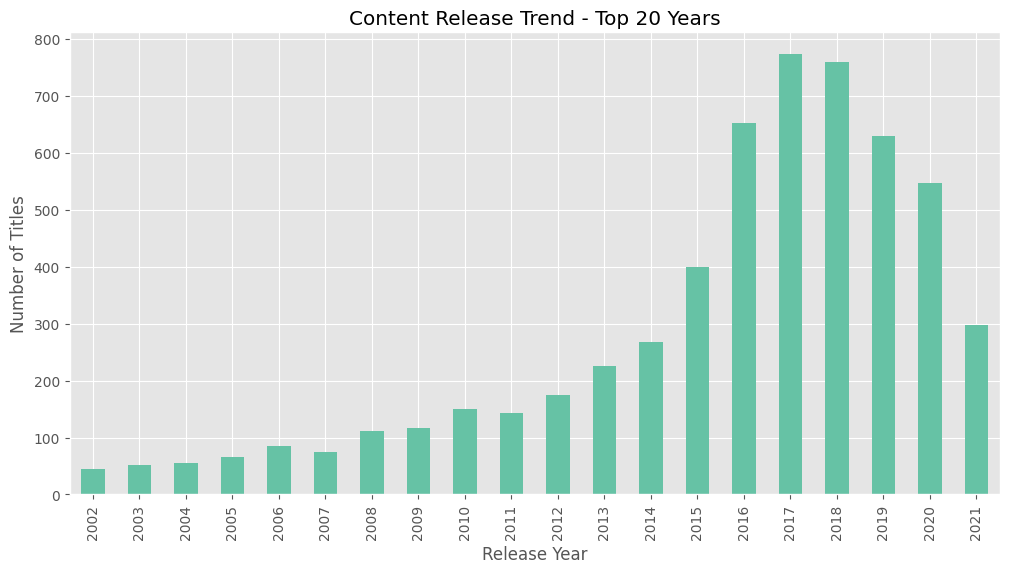

In [61]:
df['release_year'].value_counts().head(20).sort_index().plot(kind='bar', figsize=(12,6))
plt.title('Content Release Trend - Top 20 Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

### **Rating Distribution**

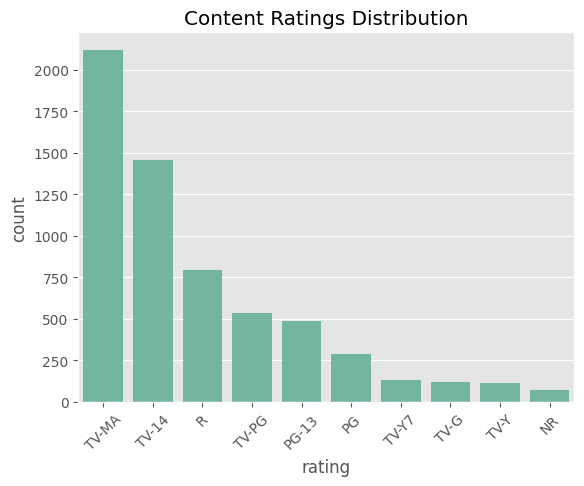

In [64]:
sns.countplot(data=df, x='rating',order=df['rating'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title('Content Ratings Distribution')
plt.show()

### **Most Popular Genres**

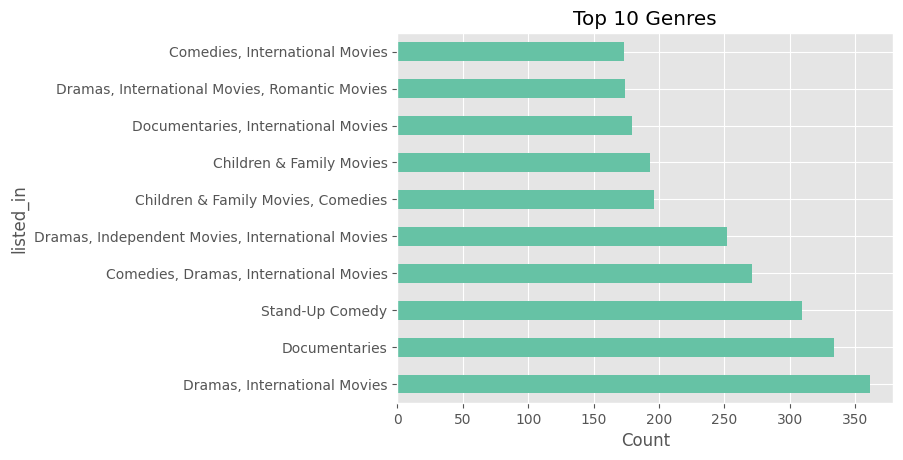

In [65]:
df['listed_in'].value_counts().head(10).plot(kind='barh', title='Top 10 Genres')
plt.xlabel('Count')
plt.show()

### **Top 10 Directors on Netflix**

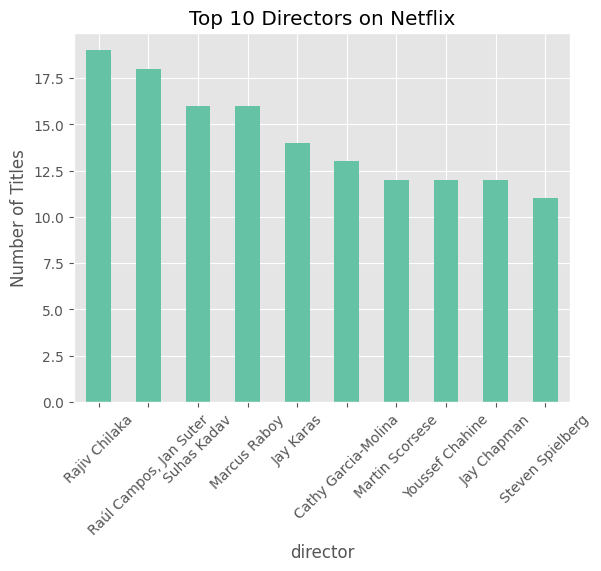

In [67]:
df['director'].value_counts().head(10).plot(kind='bar', title='Top 10 Directors on Netflix')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

### **Correlation Heatmap**

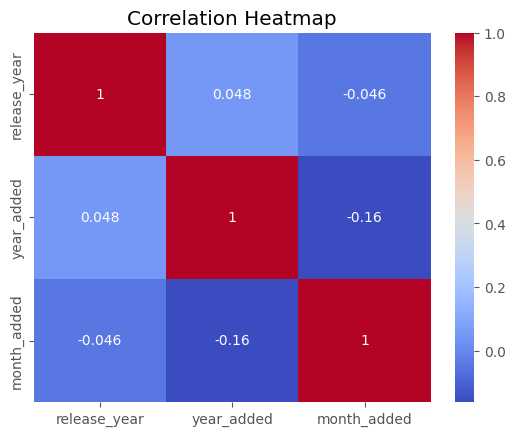

In [68]:
sns.heatmap(df.corr(numeric_only=True), annot = True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 🔚 Conclusion

- Netflix has more Movies than TV Shows.
- United States is the leading content producer.
- After 2016, content addition increased drastically.
- Popular genres include Documentaries, Dramas, and International Movies.
- Rajiv Chilaka appears to be a top director on the platform.